<a href="https://colab.research.google.com/github/zainali60/PIAIC-Q3/blob/main/SimpleRNN_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN


In [2]:
max_features = 10000
maxlen = 1000
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [4]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 1000)
input_test shape: (25000, 1000)


##Simple RNN

In [5]:
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 247s 2s/step - loss: 0.6264 - acc: 0.6338 - val_loss: 0.4804 - val_acc: 0.7940
Epoch 2/10
157/157 [==============================] - 245s 2s/step - loss: 0.3852 - acc: 0.8375 - val_loss: 0.3895 - val_acc: 0.8298
Epoch 3/10
157/157 [==============================] - 243s 2s/step - loss: 0.2819 - acc: 0.8878 - val_loss: 0.3627 - val_acc: 0.8562
Epoch 4/10
157/157 [==============================] - 243s 2s/step - loss: 0.2266 - acc: 0.9120 - val_loss: 0.4618 - val_acc: 0.8386
Epoch 5/10
157/157 [==============================] - 244s 2s/step - loss: 0.1988 - acc: 0.9244 - val_loss: 0.5181 - val_acc: 0.7928
Epoch 6/10
157/157 [==============================] - 244s 2s/step - loss: 0.1422 - acc: 0.9462 - val_loss: 0.4370 - val_acc: 0.8488
Epoch 7/10
157/157 [==============================] - 242s 2s/step - loss: 0.0988 - acc: 0.9657 - val_loss: 0.5792 - val_acc: 0.7838
Epoch 8/10
157/157 [==============================] - 242s 2s/step - 

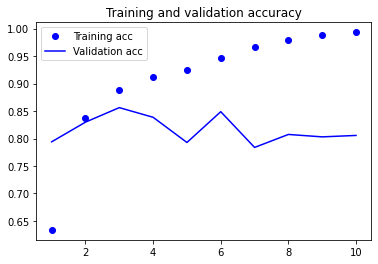

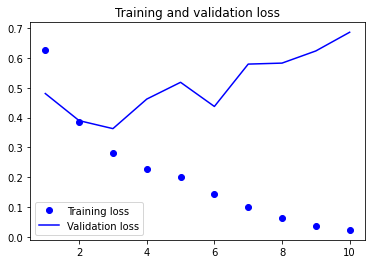

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##LSTM

In [8]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 121ms/step - loss: 0.4902 - acc: 0.7704 - val_loss: 0.3372 - val_acc: 0.8612
Epoch 2/10
157/157 [==============================] - 18s 115ms/step - loss: 0.2876 - acc: 0.8896 - val_loss: 0.3328 - val_acc: 0.8608
Epoch 3/10
157/157 [==============================] - 18s 115ms/step - loss: 0.2325 - acc: 0.9108 - val_loss: 0.3257 - val_acc: 0.8750
Epoch 4/10
157/157 [==============================] - 18s 114ms/step - loss: 0.2009 - acc: 0.9252 - val_loss: 0.6071 - val_acc: 0.8270
Epoch 5/10
157/157 [==============================] - 18s 115ms/step - loss: 0.1790 - acc: 0.9354 - val_loss: 0.3758 - val_acc: 0.8514
Epoch 6/10
157/157 [==============================] - 18s 115ms/step - loss: 0.1618 - acc: 0.9404 - val_loss: 0.4394 - val_acc: 0.8692
Epoch 7/10
157/157 [==============================] - 18s 115ms/step - loss: 0.1461 - acc: 0.9472 - val_loss: 0.3204 - val_acc: 0.8626
Epoch 8/10
157/157 [==============================] - 1

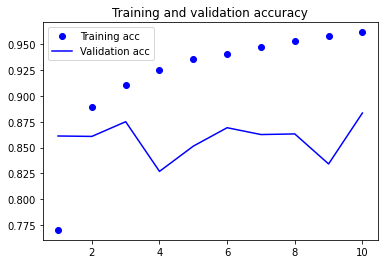

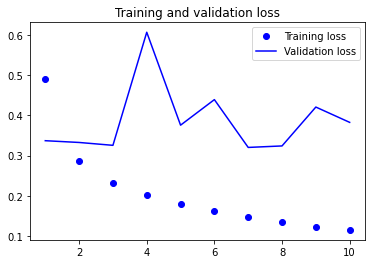

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()